In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn import linear_model

In [2]:
d = {'Area': [26, 30, 32, 36, 40], 'Price': [550, 565, 610, 680, 725]}
df = pd.DataFrame(d)
print(df)

   Area  Price
0    26    550
1    30    565
2    32    610
3    36    680
4    40    725


In [3]:
df.to_csv('HousePrice.csv',index=False)

In [4]:
df = pd.read_csv('HousePrice.csv' )
df.head()

,Area,Price
0,26,550
1,30,565
2,32,610
3,36,680
4,40,725


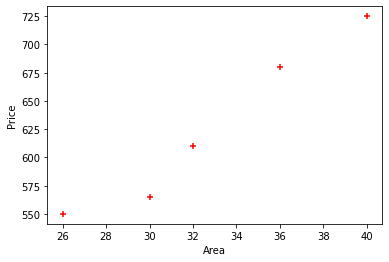

In [5]:
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.Area,df.Price,color="red",marker="+")

In [6]:
reg = linear_model.LinearRegression()
reg.fit(df[['Area']],df.Price)
reg.score(df[['Area']],df.Price)

0.9584301138199487

In [7]:
reg.predict([[32],[25],[27]])

array([615.1369863 , 520.08561644, 547.24315068])

In [8]:
reg.coef_

array([13.57876712])

In [9]:
reg.intercept_

180.61643835616445

In [10]:
135.78767123*32 + 180616.43835616432

184961.64383552433

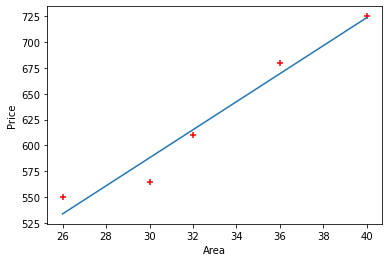

In [11]:
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.Area,df.Price,color="red",marker="+")
plt.plot(df.Area, reg.predict(df[['Area']]))

In [12]:
df['Predict'] = (reg.coef_ * df['Area']) + reg.intercept_
df['Error'] = df['Price']-df['Predict']
df['Sq_Error']=df['Error']**2
print(df['Sq_Error'].mean())

186.8150684931507


In [13]:
df

,Area,Price,Predict,Error,Sq_Error
0,26,550,533.664384,16.335616,266.852364
1,30,565,587.979452,-22.979452,528.055217
2,32,610,615.136986,-5.136986,26.388628
3,36,680,669.452055,10.547945,111.259148
4,40,725,723.767123,1.232877,1.519985


In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df['Price'], df['Predict'])

186.8150684931507

In [15]:
df['Mean'] = df['Price'].mean()
df

,Area,Price,Predict,Error,Sq_Error,Mean
0,26,550,533.664384,16.335616,266.852364,626.0
1,30,565,587.979452,-22.979452,528.055217,626.0
2,32,610,615.136986,-5.136986,26.388628,626.0
3,36,680,669.452055,10.547945,111.259148,626.0
4,40,725,723.767123,1.232877,1.519985,626.0


In [16]:
df['PriceMean'] = df['Price']-df['Mean']
df['Sq_Mean']=df['PriceMean']**2
df

,Area,Price,Predict,Error,Sq_Error,Mean,PriceMean,Sq_Mean
0,26,550,533.664384,16.335616,266.852364,626.0,-76.0,5776.0
1,30,565,587.979452,-22.979452,528.055217,626.0,-61.0,3721.0
2,32,610,615.136986,-5.136986,26.388628,626.0,-16.0,256.0
3,36,680,669.452055,10.547945,111.259148,626.0,54.0,2916.0
4,40,725,723.767123,1.232877,1.519985,626.0,99.0,9801.0


In [17]:
a = df['Sq_Error'].sum()
b = df['Sq_Mean'].sum()
r2 = 1-(a/b)
r2

0.9584301138199487

In [18]:
from sklearn.metrics import r2_score
r2_score(df['Price'], df['Predict'])

0.9584301138199487

In [24]:
filename = 'finalized_LRmodel.sav'
pickle.dump(reg, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(df[['Area']],df['Price'])
print(result)

0.9584301138199487
